<font size="5">Data dictionary:</font>
- user_id - unique identifier of our customers 
- prod_id - unique identifier of the product 
- sex - F-female, M-male sex 
- age_cat - customer age category 
- credit_status_cd - determine the credit status code 0-20. These are internal codes with no-further explanation 
- education_cat - education category - high-school degree, under grad of high school, university/college degree 
- years_in_residence - how many years customer stayed at current residence i.e. 1,2,3, 4+ years 
- car_ownership - flag of car ownership 
- prod_cat_1 - product category class 1 (internal product category classification) 
- prod_cat_2 - product category class 2 (internal product category classification) 
- prod_cat_3 - product category class 3 (internal product category classification) 
- revenue_usd - total revenue purchase.


## Load the Data

In [1]:
# Loading the required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', 250)

In [2]:
# Loading all the datasets
df1 =pd.read_csv('.\data\customer-spending-1.csv')
df2 =pd.read_csv('.\data\customer-spending-2.csv')
df3 =pd.read_csv('.\data\customer-spending-3.csv')

## Understand the data

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(200000, 12)
(200000, 12)
(137577, 12)


In [4]:
df1.head()

,user_id,prod_id,sex,age_cat,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd
0,DCN-1000001,DSKU-P00069042,F,18-25,10,university,2,0,3,NaN,NaN,9847.06
1,DCN-1000001,DSKU-P00248942,F,18-25,10,university,2,0,1,6.0,14.0,17882.35
2,DCN-1000001,DSKU-P00087842,F,18-25,10,university,2,0,12,NaN,NaN,1672.94
3,DCN-1000001,DSKU-P00085442,F,18-25,10,university,2,0,12,14.0,NaN,1243.53
4,DCN-1000002,DSKU-P00285442,M,55+,16,high,4+,0,8,NaN,NaN,9375.29


In [5]:
df2.head()

,user_id,prod_id,sex,age_cat,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd
0,DCN-1000899,DSKU-P00053842,F,26-35,1,under-high,3,1,4,5.0,12.0,1730.59
1,DCN-1000899,DSKU-P00161942,F,26-35,1,under-high,3,1,5,8.0,NaN,8410.59
2,DCN-1000899,DSKU-P00329442,F,26-35,1,under-high,3,1,5,8.0,NaN,8238.82
3,DCN-1000899,DSKU-P00031042,F,26-35,1,under-high,3,1,8,NaN,NaN,9463.53
4,DCN-1000899,DSKU-P00010742,F,26-35,1,under-high,3,1,1,8.0,17.0,22858.82


In [6]:
df3.head()

,user_id,prod_id,sex,age_cat,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd
0,DCN-1001560,DSKU-P00328442,F,26-35,3,under-high,2,0,5,14.0,NaN,8103.53
1,DCN-1001560,DSKU-P00347642,F,26-35,3,under-high,2,0,1,6.0,NaN,4509.41
2,DCN-1001560,DSKU-P00296042,F,26-35,3,under-high,2,0,8,13.0,16.0,5002.35
3,DCN-1001560,DSKU-P00350942,F,26-35,3,under-high,2,0,3,4.0,5.0,15738.82
4,DCN-1001560,DSKU-P00090942,F,26-35,3,under-high,2,0,1,2.0,14.0,22872.94


- The three datasets appear identical. I will concatenate them and eliminate any potential duplicates.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             200000 non-null  object 
 1   prod_id             200000 non-null  object 
 2   sex                 200000 non-null  object 
 3   age_cat             200000 non-null  object 
 4   credit_status_cd    200000 non-null  int64  
 5   edcution_cat        200000 non-null  object 
 6   years_in_residence  200000 non-null  object 
 7   car_ownership       200000 non-null  int64  
 8   prod_cat_1          200000 non-null  int64  
 9   prod_cat_2          138024 non-null  float64
 10  prod_cat_3          61304 non-null   float64
 11  revenue_usd         200000 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 18.3+ MB


- There are some null values in prod_cat_2 and prod_cat_3          

In [8]:
combined_df = pd.concat([df1, df2, df3], axis=0)
combined_df.head()

,user_id,prod_id,sex,age_cat,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd
0,DCN-1000001,DSKU-P00069042,F,18-25,10,university,2,0,3,NaN,NaN,9847.06
1,DCN-1000001,DSKU-P00248942,F,18-25,10,university,2,0,1,6.0,14.0,17882.35
2,DCN-1000001,DSKU-P00087842,F,18-25,10,university,2,0,12,NaN,NaN,1672.94
3,DCN-1000001,DSKU-P00085442,F,18-25,10,university,2,0,12,14.0,NaN,1243.53
4,DCN-1000002,DSKU-P00285442,M,55+,16,high,4+,0,8,NaN,NaN,9375.29


In [9]:
combined_df.describe()

,credit_status_cd,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd
count,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,8.08271,0.408797,5.295546,9.842144,12.669840,10981.011587
std,6.52412,0.491612,3.750701,5.087259,4.124341,5860.026037
min,0.00000,0.000000,1.000000,2.000000,3.000000,217.650000
25%,2.00000,0.000000,1.000000,5.000000,9.000000,6901.180000
50%,7.00000,0.000000,5.000000,9.000000,14.000000,9484.710000
75%,14.00000,1.000000,8.000000,15.000000,16.000000,14203.530000
max,20.00000,1.000000,18.000000,18.000000,18.000000,28189.410000


In [10]:
df1.nunique()

user_id                5888
prod_id                3467
sex                       2
age_cat                   7
credit_status_cd         21
edcution_cat              3
years_in_residence        5
car_ownership             2
prod_cat_1               18
prod_cat_2               17
prod_cat_3               15
revenue_usd           15793
dtype: int64

In [11]:
combined_df.nunique()

user_id                5891
prod_id                3623
sex                       2
age_cat                   7
credit_status_cd         21
edcution_cat              3
years_in_residence        5
car_ownership             2
prod_cat_1               18
prod_cat_2               17
prod_cat_3               15
revenue_usd           17959
dtype: int64

### Data Preprocessing

In [12]:
### Let us check the unique values in the data

In [13]:
# This is a function I creatrd to check the unique values in a given dataframe
def print_unique_values(df,dtype ='object', adjust = 20):
    print("No. unique values:")
    for idx, column in enumerate(df.select_dtypes(include=dtype)):
        formatted_column = f"{column}".ljust(adjust)
        unique_values    = df[column].nunique()
        print(f"{idx}) {formatted_column} : {unique_values}")

# Using the function
print_unique_values(combined_df)

No. unique values:
0) user_id              : 5891
1) prod_id              : 3623
2) sex                  : 2
3) age_cat              : 7
4) edcution_cat         : 3
5) years_in_residence   : 5


#### Data Cleaning

In [14]:
combined_df.shape

(537577, 12)

In [15]:
combined_df.duplicated().sum()

0

In [16]:
combined_df['prod_cat_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [17]:
combined_df['prod_cat_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [18]:
# Filling the nulls with '0'.
combined_df['prod_cat_2'].fillna(0, inplace=True)
combined_df['prod_cat_3'].fillna(0, inplace=True)

- Since prod_cat_2 and prod_cat_3 are already of float type, I prefer to maintain them as numeric variables. Therefore, I am filling the nulls with 0. As 0 is not present in either of them and could represent as an "Unknown".

#### Feature Engineering

In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 137576
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             537577 non-null  object 
 1   prod_id             537577 non-null  object 
 2   sex                 537577 non-null  object 
 3   age_cat             537577 non-null  object 
 4   credit_status_cd    537577 non-null  int64  
 5   edcution_cat        537577 non-null  object 
 6   years_in_residence  537577 non-null  object 
 7   car_ownership       537577 non-null  int64  
 8   prod_cat_1          537577 non-null  int64  
 9   prod_cat_2          537577 non-null  float64
 10  prod_cat_3          537577 non-null  float64
 11  revenue_usd         537577 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 53.3+ MB


In [20]:
combined_df.head(2)

,user_id,prod_id,sex,age_cat,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd
0,DCN-1000001,DSKU-P00069042,F,18-25,10,university,2,0,3,0.0,0.0,9847.06
1,DCN-1000001,DSKU-P00248942,F,18-25,10,university,2,0,1,6.0,14.0,17882.35


##### age_cat column is a object type. we can convert it into numerical by replacing it with median age of each group

In [21]:
# # Checking the unique values in age_cat
combined_df['age_cat'].unique()

array(['18-25', '55+', '26-35', '46-50', '51-55', '36-45', '0-17'],
      dtype=object)

In [22]:
# If the age is greater than 55 I am replacing it with 60
combined_df["age_cat"].apply(lambda x: 60 if '55+' in x else (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

0         21.5
1         21.5
2         21.5
3         21.5
4         60.0
          ... 
137572    40.5
137573    40.5
137574    40.5
137575    40.5
137576    40.5
Name: age_cat, Length: 537577, dtype: float64

In [23]:
combined_df["age_num"] = combined_df['age_cat'].apply(lambda x: 60 if '55+' in x else (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

combined_df.drop('age_cat', axis=1, inplace=True)
combined_df.head()

,user_id,prod_id,sex,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd,age_num
0,DCN-1000001,DSKU-P00069042,F,10,university,2,0,3,0.0,0.0,9847.06,21.5
1,DCN-1000001,DSKU-P00248942,F,10,university,2,0,1,6.0,14.0,17882.35,21.5
2,DCN-1000001,DSKU-P00087842,F,10,university,2,0,12,0.0,0.0,1672.94,21.5
3,DCN-1000001,DSKU-P00085442,F,10,university,2,0,12,14.0,0.0,1243.53,21.5
4,DCN-1000002,DSKU-P00285442,M,16,high,4+,0,8,0.0,0.0,9375.29,60.0


#####  years_in_residence is also and object. but since it represents in a numeric form I am just going to remove the '+' and change it into int64 type

In [24]:
# Checking the unique values in years_in_residence
combined_df["years_in_residence"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [25]:
combined_df["years_in_residence"] = combined_df["years_in_residence"].str.replace('+', '').astype("int64")

C:\Users\varun\AppData\Local\Temp/ipykernel_28460/1184402782.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_df["years_in_residence"] = combined_df["years_in_residence"].str.replace('+', '').astype("int64")


In [26]:
combined_df.head()

,user_id,prod_id,sex,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd,age_num
0,DCN-1000001,DSKU-P00069042,F,10,university,2,0,3,0.0,0.0,9847.06,21.5
1,DCN-1000001,DSKU-P00248942,F,10,university,2,0,1,6.0,14.0,17882.35,21.5
2,DCN-1000001,DSKU-P00087842,F,10,university,2,0,12,0.0,0.0,1672.94,21.5
3,DCN-1000001,DSKU-P00085442,F,10,university,2,0,12,14.0,0.0,1243.53,21.5
4,DCN-1000002,DSKU-P00285442,M,16,high,4,0,8,0.0,0.0,9375.29,60.0


In [27]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 137576
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             537577 non-null  object 
 1   prod_id             537577 non-null  object 
 2   sex                 537577 non-null  object 
 3   credit_status_cd    537577 non-null  int64  
 4   edcution_cat        537577 non-null  object 
 5   years_in_residence  537577 non-null  int64  
 6   car_ownership       537577 non-null  int64  
 7   prod_cat_1          537577 non-null  int64  
 8   prod_cat_2          537577 non-null  float64
 9   prod_cat_3          537577 non-null  float64
 10  revenue_usd         537577 non-null  float64
 11  age_num             537577 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 53.3+ MB


> The data appears to be in good shape. I will now proceed with Exploratory Data Analysis (EDA).

## Exploratory Data Analysis (EDA)

#### Checking the co-relation between columns in the data

[]

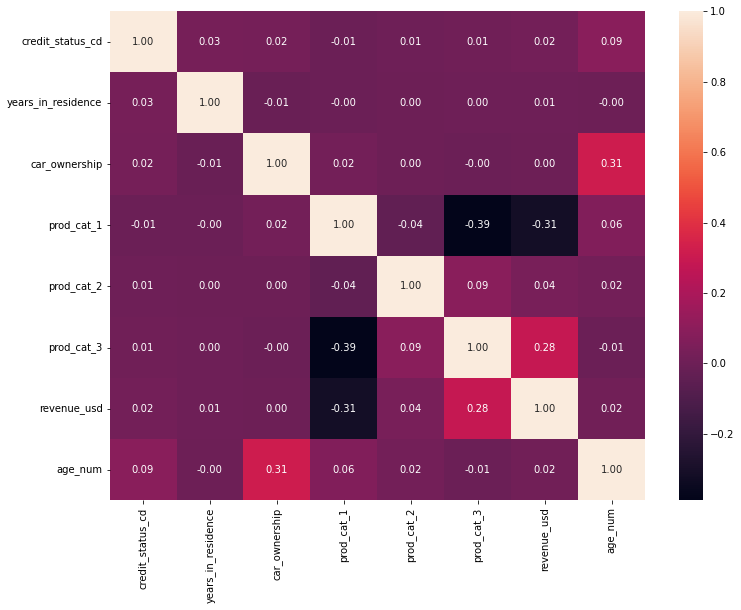

In [28]:
plt.figure(figsize=(12, 9)) 
sns.heatmap(combined_df.corr(),annot=True, fmt='.2f')
plt.plot()

- There are relationship between prod_cat1, prod_cat2, and prod_cat3, but since it is  category in encoded form there isn't much to infer from this
- Ther is relationships between Age and Credit Score, as well as Age and Car Ownership. As the Age group increases, we observe both higher credit scores and an increased likelihood of car ownership.

### To understand more about this data. I have the following questions in mind that i want answers for.
1. Which customer has the brought more revenue and in which products?
2. What are the top 10 products bringing in more revenue?
3. Which age group can we focus to bring in more revenue?
4. Which gender is purchasing more?
5. Customers with which education category and car ownership purchases more and brings in more revenue?

#### 1. Which customer has the brought more revenue and in which products?


In [29]:
user_summary = combined_df.groupby('user_id').agg({'revenue_usd': 'sum', 'prod_id': 'count'}).reset_index().sort_values('revenue_usd',ascending=False)
user_summary['perc_spent'] = (user_summary['revenue_usd']/combined_df['revenue_usd'].sum())*100
user_summary

,user_id,revenue_usd,prod_id,perc_spent
4166,DCN-1004277,12396215.30,978,0.209994
1634,DCN-1001680,10234390.51,1025,0.173372
2831,DCN-1002909,8914711.78,717,0.151016
1885,DCN-1001941,8020580.04,898,0.135870
416,DCN-1000424,7733657.62,694,0.131009
...,...,...,...,...
4351,DCN-1004464,54224.70,8,0.000919
5794,DCN-1005944,54200.00,14,0.000918
4887,DCN-1005012,53589.41,10,0.000908
4989,DCN-1005117,52272.93,8,0.000886


In [30]:
combined_df.groupby(['user_id', 'prod_id']).size().reset_index(name='count')

,user_id,prod_id,count
0,DCN-1000001,DSKU-P00000142,1
1,DCN-1000001,DSKU-P00004842,1
2,DCN-1000001,DSKU-P00025442,1
3,DCN-1000001,DSKU-P00051442,1
4,DCN-1000001,DSKU-P00051842,1
...,...,...,...
537572,DCN-1006040,DSKU-P00329242,1
537573,DCN-1006040,DSKU-P00331942,1
537574,DCN-1006040,DSKU-P00343042,1
537575,DCN-1006040,DSKU-P00346242,1


In [31]:
grp_df = combined_df.groupby(['user_id', 'prod_id']).size().reset_index(name='count')
grp_df[grp_df['count']>1].shape[0]

0

- An interesting thing to see here is that no individual user has made a significant contribution to the overall revenue.
- Another interesting fact is that the users have not made duplicate purchases of the same prod_id.

#### 2. What are the top 10 products bringing in more revenue?


In [32]:
product_revenue = combined_df.groupby('prod_id')[['revenue_usd']].mean()
product_revenue.sort_values('revenue_usd',ascending=False).reset_index()

,prod_id,revenue_usd
0,DSKU-P00086242,25056.312537
1,DSKU-P00085342,24698.593432
2,DSKU-P00200642,24093.211571
3,DSKU-P00116142,24092.076124
4,DSKU-P00119342,24063.877599
...,...,...
3618,DSKU-P00273842,617.255000
3619,DSKU-P00063242,585.886000
3620,DSKU-P00293442,562.940000
3621,DSKU-P00041442,535.930510


In [33]:
# Taking top 10 products
product_revenue = (combined_df.groupby('prod_id')[['revenue_usd']].sum().sort_values('revenue_usd',ascending=False)/combined_df['revenue_usd'].sum())*100
product_revenue.head(10)

,revenue_usd
prod_id,
DSKU-P00025442,0.548710
DSKU-P00110742,0.525793
DSKU-P00255842,0.491313
DSKU-P00184942,0.479523
DSKU-P00059442,0.477279
DSKU-P00112142,0.475971
DSKU-P00110942,0.463015
DSKU-P00237542,0.460303
DSKU-P00057642,0.448290


- There isn't any individual product that has made a substantial impact on the total revenue.

#### Which age group can we focus to bring in more revenue?

In [34]:
data_df = pd.concat([df1, df2, df3], axis=0)
data_df.head()

,user_id,prod_id,sex,age_cat,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd
0,DCN-1000001,DSKU-P00069042,F,18-25,10,university,2,0,3,NaN,NaN,9847.06
1,DCN-1000001,DSKU-P00248942,F,18-25,10,university,2,0,1,6.0,14.0,17882.35
2,DCN-1000001,DSKU-P00087842,F,18-25,10,university,2,0,12,NaN,NaN,1672.94
3,DCN-1000001,DSKU-P00085442,F,18-25,10,university,2,0,12,14.0,NaN,1243.53
4,DCN-1000002,DSKU-P00285442,M,55+,16,high,4+,0,8,NaN,NaN,9375.29


In [35]:
data_df.groupby('age_cat')['revenue_usd'].count()

age_cat
0-17      13885
18-25     98135
26-35    214694
36-45    107499
46-50     44526
51-55     37618
55+       21220
Name: revenue_usd, dtype: int64

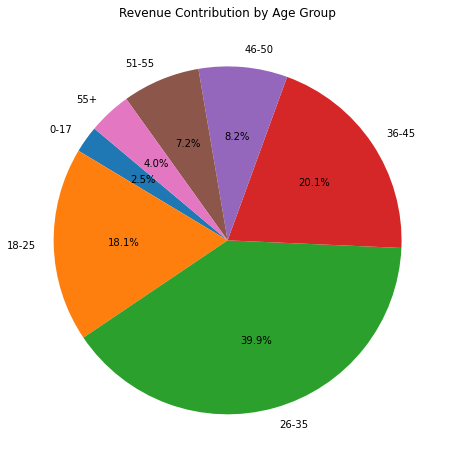

In [36]:
age_group_revenue = data_df.groupby('age_cat')['revenue_usd'].sum()

plt.figure(figsize=(8, 8))  
plt.pie(age_group_revenue, labels=age_group_revenue.index, autopct='%1.1f%%', startangle=140)

plt.title('Revenue Contribution by Age Group')
plt.show()

- We can observe that the age groups 26-35 and 36-45 have collectively accounted for 59.9% of all purchases.
- From the chart, we can observe that they also contribute to approximately 60% of the total revenue.
- **From both these observations, it's apparent that all age groups, on average have spent at a similar level.**

#### Which gender is purchasing more?


[]

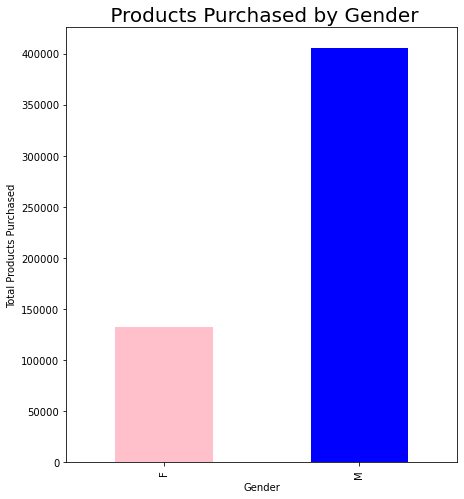

In [37]:
gender_revenue = combined_df.groupby('sex')['prod_id'].count()

plt.figure(figsize=(7, 8)) 
gender_revenue.plot(kind='bar', color=['Pink', 'Blue'])

plt.xlabel('Gender')
plt.ylabel('Total Products Purchased')
plt.title(' Products Purchased by Gender', fontdict={'fontsize': 20})
plt.plot()

- It's clear from the data that males have made purchases nearly three times higher than females.

#### Customers with which education category and car ownership purchases more and brings in more revenue?

In [38]:
combined_df.head()

,user_id,prod_id,sex,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd,age_num
0,DCN-1000001,DSKU-P00069042,F,10,university,2,0,3,0.0,0.0,9847.06,21.5
1,DCN-1000001,DSKU-P00248942,F,10,university,2,0,1,6.0,14.0,17882.35,21.5
2,DCN-1000001,DSKU-P00087842,F,10,university,2,0,12,0.0,0.0,1672.94,21.5
3,DCN-1000001,DSKU-P00085442,F,10,university,2,0,12,14.0,0.0,1243.53,21.5
4,DCN-1000002,DSKU-P00285442,M,16,high,4,0,8,0.0,0.0,9375.29,60.0


In [39]:
combined_df.groupby(['edcution_cat', 'car_ownership'])[['revenue_usd']].mean()

revenue_usd
edcution_cat car_ownership              
high         0              11565.160906
             1              11603.264878
under-high   0              10814.411239
             1              10832.915455
university   0              10613.220759
             1              10418.491456

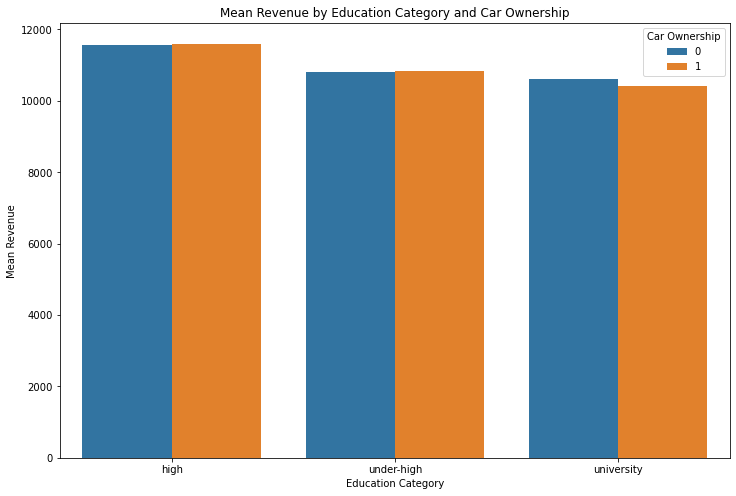

In [40]:
# Group by education_cat and car_ownership and calculate the mean revenue
edu_car_revenue = combined_df.groupby(['edcution_cat', 'car_ownership'])[['revenue_usd']].mean().reset_index()

plt.figure(figsize=(12, 8))

sns.barplot(x='edcution_cat', y='revenue_usd', hue='car_ownership', data=edu_car_revenue)

plt.xlabel('Education Category')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue by Education Category and Car Ownership')
plt.legend(title='Car Ownership', loc='upper right')

plt.show()

- Here it it observable that users in the high education category exhibit slightly higher average revenue.

> Now that we have gained insights into the data, let's proceed to the application of machine learning techniques and models.</font>

## Application of ML

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
combined_df.head()

,user_id,prod_id,sex,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd,age_num
0,DCN-1000001,DSKU-P00069042,F,10,university,2,0,3,0.0,0.0,9847.06,21.5
1,DCN-1000001,DSKU-P00248942,F,10,university,2,0,1,6.0,14.0,17882.35,21.5
2,DCN-1000001,DSKU-P00087842,F,10,university,2,0,12,0.0,0.0,1672.94,21.5
3,DCN-1000001,DSKU-P00085442,F,10,university,2,0,12,14.0,0.0,1243.53,21.5
4,DCN-1000002,DSKU-P00285442,M,16,high,4,0,8,0.0,0.0,9375.29,60.0


### Encode the data

In [43]:
from sklearn.preprocessing import LabelEncoder 

# Creating a Encoder function to save the encoders
def text_to_numbers(df): 
    le_dict = dict() 
    col = df.select_dtypes(include=['object']).columns 
    for i in col: 
        print(i)
        le_dict[i] = LabelEncoder() 
        df[i] = le_dict[i].fit_transform(df[i]) 
    return df, le_dict 
    
def numbers_to_text(df, le_dict): 
    for i in le_dict.keys(): 
        df[i] = le_dict[i].inverse_transform(df[i]) 
    return df

In [44]:
encoded_df, le_dict = text_to_numbers(combined_df) 

user_id
prod_id
sex
edcution_cat


In [45]:
# Checking the encoder objects
le_dict

{'user_id': LabelEncoder(),
 'prod_id': LabelEncoder(),
 'sex': LabelEncoder(),
 'edcution_cat': LabelEncoder()}

In [46]:
encoded_df.head()

,user_id,prod_id,sex,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd,age_num
0,0,670,0,10,2,2,0,3,0.0,0.0,9847.06,21.5
1,0,2374,0,10,2,2,0,1,6.0,14.0,17882.35,21.5
2,0,850,0,10,2,2,0,12,0.0,0.0,1672.94,21.5
3,0,826,0,10,2,2,0,12,14.0,0.0,1243.53,21.5
4,1,2732,1,16,0,4,0,8,0.0,0.0,9375.29,60.0


In [47]:
# Removing 'prod_cat_2' and 'prod_cat_3' as it had nulls and was imputed with 0.
X = encoded_df.drop(columns=['user_id','prod_cat_2','prod_cat_3','revenue_usd'])  
y = encoded_df['revenue_usd']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Utilizing tree-based models for prediction, with particular attention to the potential beneficial influence of categorical columns like sex, edcution_cat, car_ownership and prod_cat_1.

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Model Performance.')
print('------------------')
DT_regressor = DecisionTreeRegressor(random_state = 0)
DT_regressor.fit(X_train, y_train)
y_pred_train = DT_regressor.predict(X_train)

print('Decision Tree Regressor:')
print('R2 Score Train:',round(r2_score(y_train, y_pred_train),4))
y_pred = DT_regressor.predict(X_test)
print('R2 Score Test:',round(r2_score(y_test, y_pred),4))
print('RMSE Score:',round(mean_squared_error(y_test, y_pred, squared = False),2))

rf_regressor = RandomForestRegressor(random_state = 0,max_depth=7)
rf_regressor.fit(X_train, y_train)
y_pred_train = rf_regressor.predict(X_train)

print('\nRandom Forest Regressor:')
print('R2 Score Train:',round(r2_score(y_train, y_pred_train),4))
y_pred = rf_regressor.predict(X_test)
print('R2 Score Test:',round(r2_score(y_test, y_pred),4))
print('RMSE Score:',round(mean_squared_error(y_test, y_pred, squared = False),2))

xgb_r = xg.XGBRegressor(random_state = 0)
xgb_r.fit(X_train, y_train)
y_pred_train = xgb_r.predict(X_train)

print('\nXG Boost Regressor:')
print('R2 Score Train:',round(r2_score(y_train, y_pred_train),4))
y_pred = xgb_r.predict(X_test)
print('R2 Score Test:',round(r2_score(y_test, y_pred),4))
print('RMSE Score:',round(mean_squared_error(y_test, y_pred, squared = False),2))

Model Performance.
------------------
Decision Tree Regressor:
R2 Score Train: 0.9665
R2 Score Test: 0.4406
RMSE Score: 4385.03

Random Forest Regressor:
R2 Score Train: 0.6567
R2 Score Test: 0.6559
RMSE Score: 3439.21

XG Boost Regressor:
R2 Score Train: 0.7165
R2 Score Test: 0.7091
RMSE Score: 3161.97


- Decision tree is clearly overfiting.
- The Random Forest Regressor demonstrates a strong training score, and there is potential for improvement in the test score through hyperparameter tuning.
- The XGBoost Regressor appears to have achieved a well-balanced model with a train-test split.

		Importance Score:



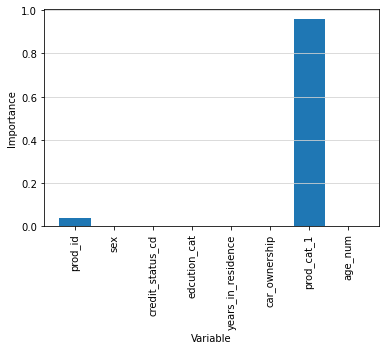

In [49]:
characteristics = X_train.columns

print('\t\tImportance Score:\n')
importances = list(rf_regressor.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)

plt.bar(characteristics, importances, orientation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = '#D3D3D3', linestyle = 'solid')
plt.show()

- We can see here that the model is mainly depending on the Prod_cat_1 column to make the predictions.

### Tree explanation

In [50]:
from sklearn.tree import export_text

In [51]:
def print_random_forest_tree(rf_regressor, feature_names):
    tree_rules = export_text(rf_regressor.estimators_[0], feature_names=feature_names, spacing=3)
    print(tree_rules)


In [52]:
print_random_forest_tree(rf_regressor, X_train.columns.tolist())

|--- prod_cat_1 <= 2.50
|   |--- prod_cat_1 <= 1.50
|   |   |--- prod_id <= 1125.00
|   |   |   |--- prod_id <= 775.00
|   |   |   |   |--- prod_id <= 727.00
|   |   |   |   |   |--- edcution_cat <= 0.50
|   |   |   |   |   |   |--- credit_status_cd <= 1.50
|   |   |   |   |   |   |   |--- value: [15869.16]
|   |   |   |   |   |   |--- credit_status_cd >  1.50
|   |   |   |   |   |   |   |--- value: [16756.73]
|   |   |   |   |   |--- edcution_cat >  0.50
|   |   |   |   |   |   |--- prod_id <= 228.00
|   |   |   |   |   |   |   |--- value: [14670.51]
|   |   |   |   |   |   |--- prod_id >  228.00
|   |   |   |   |   |   |   |--- value: [15610.61]
|   |   |   |   |--- prod_id >  727.00
|   |   |   |   |   |--- years_in_residence <= 0.50
|   |   |   |   |   |   |--- prod_id <= 762.50
|   |   |   |   |   |   |   |--- value: [11544.47]
|   |   |   |   |   |   |--- prod_id >  762.50
|   |   |   |   |   |   |   |--- value: [7886.44]
|   |   |   |   |   |--- years_in_residence >  0.50
|   | 

### Model tuning

In [53]:
from sklearn.model_selection import GridSearchCV
import multiprocessing

def model_tune(model, X_train, y_train, X_test, y_test, param_grid={'random_state':[0]}):    
    n_jobs = multiprocessing.cpu_count() - 1  
    grid_search = GridSearchCV(model(), param_grid=param_grid, cv=3,n_jobs=n_jobs)
    grid_search.fit(X_train, y_train)

    combination_= []
    train_r2    = []
    test_r2     = []
    test_RMSE   = []
    train_RMSE  = []
    for i, params in enumerate(grid_search.cv_results_['params']):
        model2 = model(**params)
        model2.fit(X_train, y_train)
        combination_.append(params)
        train_r2.append(model2.score(X_train, y_train)*100)
        test_r2.append(model2.score(X_test, y_test)*100)
        test_RMSE.append(mean_squared_error(y_test, model2.predict(X_test), squared = False))
        train_RMSE.append(mean_squared_error(y_train, model2.predict(X_train), squared = False))
    
    results_df = pd.DataFrame({'Combinations':combination_,'Train R2':train_r2,'Test R2':test_r2,'Train RMSE':train_RMSE,'Test RMSE':test_RMSE})
    param = results_df.sort_values('Test R2',ascending=False).head(1)['Combinations'].values[0]
    
    
    tuned_model =model(**param)
    tuned_model.fit(X_train, y_train)
    
    y_pred_train = tuned_model.predict(X_train)
    y_pred = tuned_model.predict(X_test)

    print('R2 Score Train:',round(r2_score(y_train, y_pred_train),4))
    print('R2 Score Test:',round(r2_score(y_test, y_pred),4))
    print('RMSE Score:',round(mean_squared_error(y_test, y_pred, squared = False),2))

    return results_df, tuned_model

In [54]:
param_grid ={'max_depth': [None,5,7], 'random_state':[0], 'n_estimators': [25,50,100]
             , 'learning_rate':[0.1,0.3]}
results_df, tuned_Xgbmodel = model_tune(xg.XGBRegressor,X_train,y_train,X_test, y_test,param_grid)


R2 Score Train: 0.7301
R2 Score Test: 0.7162
RMSE Score: 3123.38


In [55]:
results_df.sort_values("Test RMSE")

,Combinations,Train R2,Test R2,Train RMSE,Test RMSE
17,"{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100, 'random_state': 0}",73.009611,71.617635,3044.056132,3123.384718
11,"{'learning_rate': 0.3, 'max_depth': None, 'n_estimators': 100, 'random_state': 0}",71.645837,70.911965,3120.013671,3161.974665
16,"{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 50, 'random_state': 0}",71.297947,70.550878,3139.095733,3181.539824
14,"{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0}",70.388553,70.083871,3188.437419,3206.667181
8,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'random_state': 0}",70.336262,69.843966,3191.251441,3219.499039
10,"{'learning_rate': 0.3, 'max_depth': None, 'n_estimators': 50, 'random_state': 0}",70.156401,69.787290,3200.911601,3222.523031
15,"{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 25, 'random_state': 0}",69.663347,69.284179,3227.244819,3249.243445
2,"{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100, 'random_state': 0}",69.126730,68.918900,3255.662654,3268.506723
13,"{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50, 'random_state': 0}",68.841135,68.721222,3270.686347,3278.884225
7,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'random_state': 0}",68.784776,68.512520,3273.642935,3289.804879


In [56]:
param_grid ={'max_depth': [None,7,9],'random_state':[0],'n_estimators': [25,50, 100],
             'min_samples_split':[2,3]}

results_df, tuned_Rfmodel = model_tune(RandomForestRegressor,X_train,y_train,X_test, y_test, param_grid)

R2 Score Train: 0.6752
R2 Score Test: 0.6729
RMSE Score: 3352.84


In [57]:
results_df.sort_values("Test RMSE")

,Combinations,Train R2,Test R2,Train RMSE,Test RMSE
14,"{'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0}",67.515033,67.294369,3339.560380,3352.837104
17,"{'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 0}",67.514632,67.294223,3339.580997,3352.844625
13,"{'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 0}",67.509596,67.285173,3339.839814,3353.308449
16,"{'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 0}",67.509172,67.284837,3339.861634,3353.325699
12,"{'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 25, 'random_state': 0}",67.507844,67.271284,3339.929856,3354.020203
15,"{'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 25, 'random_state': 0}",67.507463,67.270656,3339.949469,3354.052358
5,"{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 0}",91.624344,66.913282,1695.733125,3372.314252
4,"{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 50, 'random_state': 0}",91.465593,66.720031,1711.728001,3382.148320
2,"{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0}",92.998636,66.279592,1550.384436,3404.455025
3,"{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 25, 'random_state': 0}",91.168107,66.257824,1741.305588,3405.553702


> The XgBoost has a decent train-test score and can be used to predict for future records.

### Segmentation

In [58]:
combined_df.head(5)

,user_id,prod_id,sex,credit_status_cd,edcution_cat,years_in_residence,car_ownership,prod_cat_1,prod_cat_2,prod_cat_3,revenue_usd,age_num
0,0,670,0,10,2,2,0,3,0.0,0.0,9847.06,21.5
1,0,2374,0,10,2,2,0,1,6.0,14.0,17882.35,21.5
2,0,850,0,10,2,2,0,12,0.0,0.0,1672.94,21.5
3,0,826,0,10,2,2,0,12,14.0,0.0,1243.53,21.5
4,1,2732,1,16,0,4,0,8,0.0,0.0,9375.29,60.0


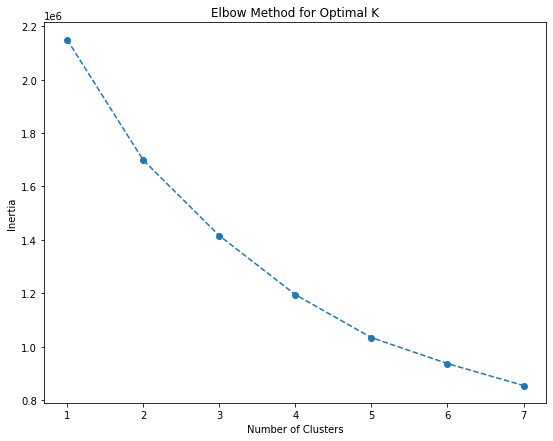

C:\Users\varun\AppData\Local\Temp/ipykernel_28460/2401734997.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['credit_status_cd', 'edcution_cat', 'age_num', 'revenue_usd']
data = combined_df[features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia to help choose the optimal number of clusters
plt.figure(figsize=(9, 7))
plt.plot(range(1, 8), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Assign cluster back to the data
data['cluster'] = kmeans.labels_


In [60]:
data['cluster'].value_counts()

3    192222
1    130047
2    109297
0    106011
Name: cluster, dtype: int64

## Recomendation

Recomendation models can be used to, 
- Improve cross-selling and upselling
- Target promotions to specific customers
- Increase customer engagement, conversion rates

In [61]:
# Taking the df1 dataset to avoide memory issue
combined_df_rec = df1[['user_id','prod_id']]

In [62]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the dataset into a transactional format
basket = pd.get_dummies(combined_df_rec, columns=['prod_id'], prefix='', prefix_sep='')
basket = basket.groupby('user_id').sum()

#basket[basket > 0] = 1

In [63]:
basket

,DSKU-P00000142,DSKU-P00000242,DSKU-P00000342,DSKU-P00000442,DSKU-P00000542,DSKU-P00000642,DSKU-P00000742,DSKU-P00000842,DSKU-P00000942,DSKU-P00001042,...,DSKU-P0098942,DSKU-P0099042,DSKU-P0099142,DSKU-P0099242,DSKU-P0099342,DSKU-P0099442,DSKU-P0099642,DSKU-P0099742,DSKU-P0099842,DSKU-P0099942
user_id,,,,,,,,,,,,,,,,,,,,,
DCN-1000001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DCN-1000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DCN-1000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DCN-1000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DCN-1000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DCN-1006036,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DCN-1006037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DCN-1006038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# min support had to be reduced to find frequent products.
frequent_itemsets = apriori(basket, min_support=0.008, use_colnames=True)
frequent_itemsets

D:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.073030,(DSKU-P00000142)
1,0.022418,(DSKU-P00000242)
2,0.014266,(DSKU-P00000342)
3,0.031080,(DSKU-P00000642)
4,0.016135,(DSKU-P00000742)
...,...,...
2100,0.008832,"(DSKU-P00265242, DSKU-P00334242)"
2101,0.008152,"(DSKU-P00329542, DSKU-P00270942)"
2102,0.009001,"(DSKU-P0097242, DSKU-P00270942)"
2103,0.009171,"(DSKU-P00274942, DSKU-P00278642)"


In [65]:
# Confidence also had to be reduced to get combinations.
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)

# Convert frozensets to a more readable format
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

print(rules.shape)
rules.head()

(46, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,DSKU-P00289942,DSKU-P00000142,0.051121,0.073030,0.010530,0.205980,2.820490,0.006797,1.167439
1,DSKU-P00000642,DSKU-P00005042,0.031080,0.064538,0.008152,0.262295,4.064193,0.006146,1.268071
2,DSKU-P00127842,DSKU-P00025442,0.037194,0.106488,0.008662,0.232877,2.186887,0.004701,1.164757
3,DSKU-P00193542,DSKU-P00025442,0.040082,0.106488,0.008322,0.207627,1.949774,0.004054,1.127641
4,DSKU-P00233542,DSKU-P00025442,0.039912,0.106488,0.008152,0.204255,1.918111,0.003902,1.122863


### Recommending for user from df2

In [66]:
test_user = df2[df2['user_id']=='DCN-1000899'][['user_id','prod_id']]
test_user

,user_id,prod_id
0,DCN-1000899,DSKU-P00053842
1,DCN-1000899,DSKU-P00161942
2,DCN-1000899,DSKU-P00329442
3,DCN-1000899,DSKU-P00031042
4,DCN-1000899,DSKU-P00010742
...,...,...
195497,DCN-1000899,DSKU-P00216942
195498,DCN-1000899,DSKU-P00034242
195499,DCN-1000899,DSKU-P00042842
195500,DCN-1000899,DSKU-P00108442


In [67]:
user_cart = list(test_user['prod_id'])
recommended_products = set()

for cart_item in user_cart:
    matching_rules = rules[rules['antecedents'].apply(lambda x: cart_item in x)]
    recommended_products.update(matching_rules['consequents'])

print(f"Recommended Products:{recommended_products}")

Recommended Products:{'DSKU-P00057642', 'DSKU-P00117442'}


<font color='#00A0AF'><B style="font-size:32px;">Conclusion </B>
>In summary, the above recommendation model, though effective, can be further enhanced with more extensive customer behavioral data. customer behavioral data can enable us to cluster and segment customers, allowing for tailored recommendation models.

>From these segments, we can identify high-performing segments from which we can build association rules. Additionally, the low-performing segments can be targeted as opportunities for revenue-focused marketing campaigns.